<a href="https://colab.research.google.com/github/Deeksha-coder-debug/ML-Projects/blob/main/Dogs_vs_Cats_classifier_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPU vs GPU in Deep Learning
🔹 CPU (Central Processing Unit)

General-purpose processor (like a multi-tasking manager 🧑‍💼).

Has a few powerful cores (e.g., 4–16).

Great for:

Running normal Python code

Small ML tasks (like Logistic Regression, Decision Trees)

Preprocessing data

🔹 GPU (Graphics Processing Unit)

Originally built for rendering video games 🎮, but perfect for deep learning.

Has thousands of smaller cores (parallel workers).

CNN training = involves millions of matrix multiplications (Conv2D, Dense layers).

GPU can do these operations in parallel, much faster than CPU. **

# Uploading the kaggle json file for api

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saideekshacoder","key":"3c4c983d2bd526bed4832dfdb0531c8c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Downloading the dataset as zip file

In [ ]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:05<00:00, 223MB/s]
100% 1.06G/1.06G [00:05<00:00, 207MB/s]


# Unzipping the dataset file

In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
# Sequential = linear stack of layers.
# Imagine a pipeline: Input → Conv → Pool → Dense → Output.
# You use this when your network flows in a straight line (no multiple inputs/outputs or fancy branching).
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
# Conv2D
# This is the Convolutional layer, the heart of CNNs ❤️.
# It applies filters/kernels (like tiny magnifying glasses 🔍) that slide over the image and detect patterns.
# Early layers → detect edges, colors, textures.
# Later layers → detect ears, noses, whiskers, paws.

# MaxPool2D
# This is the Pooling layer (aka downsampling).
# It reduces the spatial size of the feature maps → keeps important features, throws away noise.
# Think of it as zooming out 📉 so the network focuses on "dog ear" instead of every single pixel in the ear.

# Dense
# This is a fully connected layer (like in normal neural networks).
# After convolution + pooling, we flatten the features into a 1D vector.
# The Dense layers combine those features to make a final decision: "Is it a dog 🐕 or a cat 🐈?"

# Flatten
# Takes the 2D feature maps from Conv2D/MaxPool2D and turns them into a 1D vector.
# Why? Because Dense layers expect a flat vector, not an image grid.

# BatchNormalization
# In each layer, neurons produce outputs → but their values can vary wildly (some huge, some tiny).
# This makes training unstable (gradients blow up or vanish 🚀💥).
# BatchNormalization fixes this by:
# Normalizing activations in each batch to have mean ~0, variance ~1.
# Then re-scales them with trainable parameters (so network can still learn optimally).

# Dropout
# During training, randomly “turns off” some neurons (sets them to 0).
# Example: Dropout rate = 0.5 → half the neurons are ignored each step.
# Why? Prevents the network from relying too much on specific neurons (overfitting).


# Generator Concept

1️⃣ Python Generators (Core Concept)

A generator in Python is like a lazy waiter 🍽️ — it doesn’t bring all the dishes at once, it gives you one dish at a time when you ask.

Built with yield instead of return.

Saves memory because you don’t store the whole dataset in RAM.

Example:

def number_gen():
    for i in range(1, 6):
        yield i   # instead of returning everything at once


Usage:

gen = number_gen()
print(next(gen))  # 1
print(next(gen))  # 2


👉 Each call to next() gives the next item. Perfect for big data streams.

2️⃣ Generators in Deep Learning (Keras/TensorFlow)

Now in the CNN dog-vs-cat world 🐶🐱, generators usually mean:

Data generators: Tools that load images in batches (instead of all at once).

Why? Because 25,000 dog/cat images won’t fit in your laptop RAM 🖥️.

In [ ]:
# generators

# 👉 “Hey, my images are sitting inside folders. Please load them in batches,
# resize them, and also give me the correct labels automatically.”
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

# directory='/content/train'
# → Looks inside the train folder where cats/dogs subfolders are stored.

# labels='inferred'
# → Keras automatically infers labels from subfolder names.
# (cats → 0, dogs → 1).

# label_mode='int'
# → Labels will be integers (0, 1).

# Other options:

# "categorical" → one-hot encoded [1,0] / [0,1]

# "binary" → 0/1 but only for 2 classes

# batch_size=32
# → Instead of loading all images, it gives them in mini-batches of 32.
# This helps GPU training and saves memory.

# image_size=(256,256)
# → Every image (cat/dog) will be resized to 256×256 pixels (since CNNs need uniform input size).

# ✅ Now train_ds is a dataset you can directly plug into your model.

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


1️⃣ Why Normalization?

* Images are originally in pixel range [0, 255] (integers).

* Neural nets love small, consistent values → typically [0, 1] or [-1, 1].

* If you don’t normalize → gradients explode 🚀, training is unstable, model converges slower.

2️⃣ Line by Line
* def process(image, label):

Defines a preprocessing function that takes:

* * image: your cat/dog picture as a tensor.

* * label: its class (0 = cat, 1 = dog).

* image = tf.cast(image/255., tf.float32)

* image/255. → scales every pixel to [0, 1].

* tf.cast(..., tf.float32) → ensures the type is float32, which TensorFlow models expect (not uint8).

* return image, label

* * Keeps the image normalized but passes the label unchanged.

3️⃣ train_ds = train_ds.map(process)

* .map() applies the process function to every batch inside the dataset.

So now, each batch your model sees is already normalized.

In [ ]:
# Normalize

def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [17]:
# create CNN model

model=Sequential()
# Sequential model = straight pipeline (no branching).
# You’ll stack layers in order: Conv → Pool → Conv → Pool → Flatten → Dense → Output


# Conv2D(32, (3,3)) → 32 filters, each 3×3 in size.

# Detects edges, corners, colors in the raw image.
# input_shape=(256,256,3) → input image size = 256×256 pixels with 3 channels (RGB).
# activation='relu' → introduces non-linearity (ignores negatives, keeps positive signals).
# padding='valid' → no extra padding, image shrinks a bit after convolution.

# Pooling (2×2) → reduces size by half, keeps only strong signals.
# Think of it as zooming out 🧐, but still keeping "cat ear" or "dog nose" patterns.

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Now 64 filters: can detect shapes & textures (fur, eyes, whiskers).
# Pooling again halves the size → network becomes more feature-focused, less pixel-focused.

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# 128 filters: now network learns complex features (like entire dog faces, cat bodies).
# Pooling reduces spatial complexity further

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

# Converts 2D feature maps → 1D vector.
# Without this, Dense layers won’t work (they need flat vectors).

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))

# Fully connected layers = decision makers 🧠.
# Combine features detected (ears + whiskers + paws = cat, droopy ears + snout = dog).

model.add(Dense(1,activation='sigmoid'))

# Output layer.
# 1 neuron + sigmoid = binary classification.
# Output: value between 0 and 1.
# Close to 0 → Cat 🐱
# Close to 1 → Dog 🐶

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

optimizer='adam' → smart gradient descent.

loss='binary_crossentropy' → best for binary classification (cat vs dog).

metrics=['accuracy'] → track accuracy while training.

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 88ms/step - accuracy: 0.5654 - loss: 2.0515 - val_accuracy: 0.6048 - val_loss: 0.7171
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.6407 - loss: 0.6424 - val_accuracy: 0.6942 - val_loss: 0.5817
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.7253 - loss: 0.5554 - val_accuracy: 0.5672 - val_loss: 1.3334
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7493 - loss: 0.5263 - val_accuracy: 0.7568 - val_loss: 0.5209
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.7762 - loss: 0.4869 - val_accuracy: 0.7442 - val_loss: 0.5331
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.7888 - loss: 0.4722 - val_accuracy: 0.7742 - val_loss: 0.5074
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8175 - loss: 0.4293 - val_accuracy: 0.7602 - val_loss: 0.5242
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.8388 - loss: 0.3818 - 

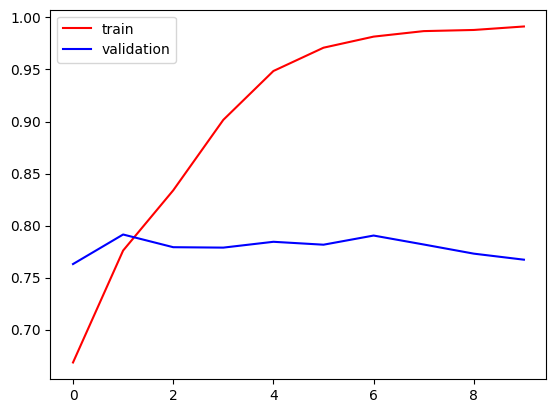

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

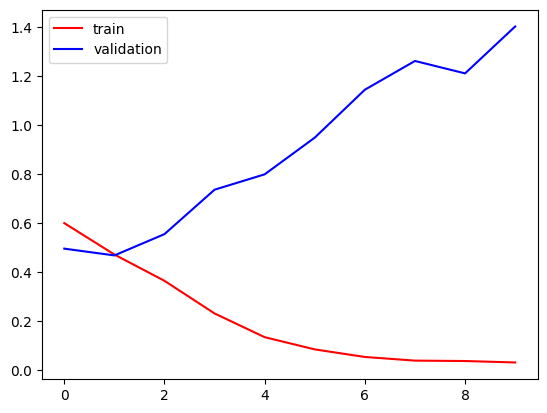

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

The plot shows that the model is overfitting with training data so training loss is less whereas test loss is more

There're various methods to reduce overfitting
* Add more data
* Data Augmentation
* L1/L2 regualarization
* Dropout
* Batch Normalization
* Reduce complexity

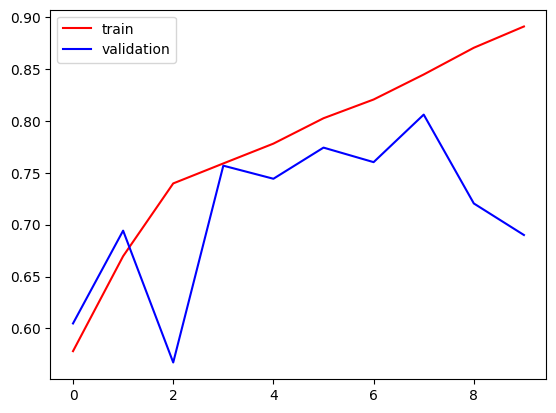

In [21]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

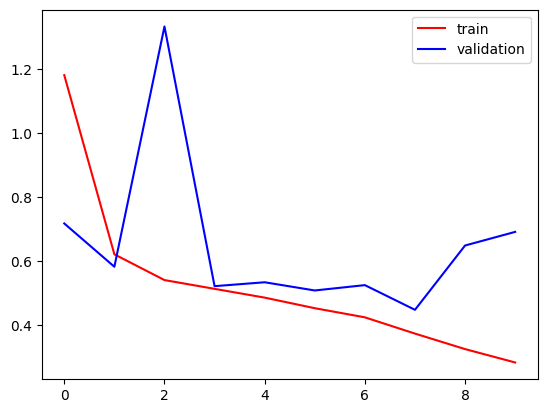

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [24]:
import cv2
test_img=cv2.imread('/content/dog.webp')

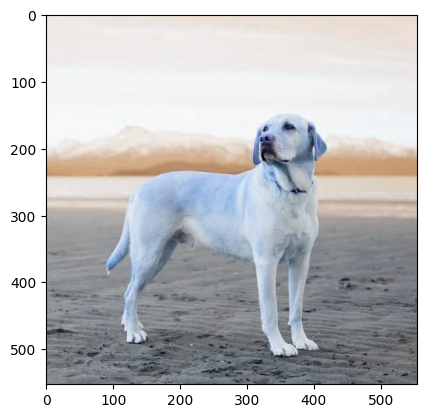

In [25]:
plt.imshow(test_img)

In [26]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))

In [27]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

Here 1 represents dog

In [29]:
test_img2=cv2.imread('/content/cat.jpeg')
test_img2=cv2.resize(test_img2,(256,256))
test_input2=test_img2.reshape((1,256,256,3))


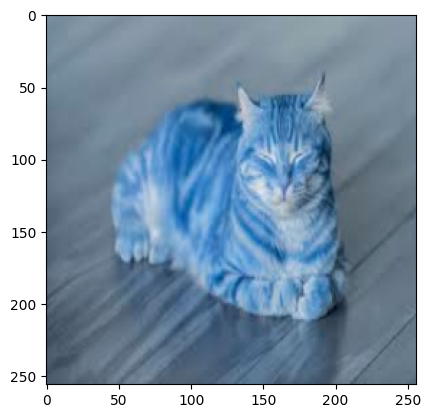

In [31]:
plt.imshow(test_img2)

In [33]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.]], dtype=float32)

Here 0 represents cat